In [1]:
import os
import glob
import time
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize

from hyss_util import *


In [2]:
# -- set mpl defaults
plt.rcParams["image.interpolation"] = "nearest"
plt.rcParams["image.cmap"] = "gist_gray"
plt.rcParams['axes.titlepad'] = 0 

In [8]:
%matplotlib widget

In [14]:
** LOAD THE HYPERSPECTRAL DATA **

SyntaxError: invalid syntax (1429228611.py, line 1)

In [59]:
hsi0 = np.load("../output/filtered_hsi0.npy")
# hsi1 = np.load("../output/filtered_hsi1.npy")

# -- resize hsi0
hsi0_resize = hsi0[:, 238:933, 0:1087]

In [60]:
def get_aggre_spec(hsi, x0, x1, y0, y1, x2, x3, y2, y3):
    
    
    """
    Read cleaned hyperspectral image data and create masked aggregate spectrum
    
    Parameters:
    -----------
    
    
    hsi: three dimentionsal array
    cleaned hyperspectral image data
    
    x0, x1, x2, x3, y0, y1, y2, y3: x and y location of masked area
    
    Returns:
    --------
    hsi: masked hyperspectral image data 
    
    hsi_spec_agg: the aggregated spec
      
    """
    # -- set up row/col grid
    cc, rr = np.meshgrid(range(hsi.shape[2]), range(hsi.shape[1]))

    # -- get pixels for patch
    pchs = [[y0, x0, y1, x1], 
        [y2, x2, y3, x3]]

    # -- make the patches
    pval = -9999
    for pch in pchs:
        pind = (rr >= pch[0]) & (rr < pch[2]) & (cc >= pch[1]) & (cc < pch[3]) 
        hsi[:, pind] = pval
        
    # -- get aggregate spectrum
    gind = hsi[0] != pval
    hsi_spec_agg = hsi[:, gind].mean(axis=1)
    hsi_spec_agg = (hsi_spec_agg - hsi_spec_agg.min()) / (hsi_spec_agg.max() - hsi_spec_agg.min())
    
    return hsi, hsi_spec_agg

In [61]:
# hsi0, aggre_no_new = get_aggre_spec(hsi0_resize, 320, 475, 320, 695, 130, 225, 165, 400)
hsi0, aggre_no_new = get_aggre_spec(hsi0_resize, 500, 790, 360, 560, 0, 0, 0, 0)

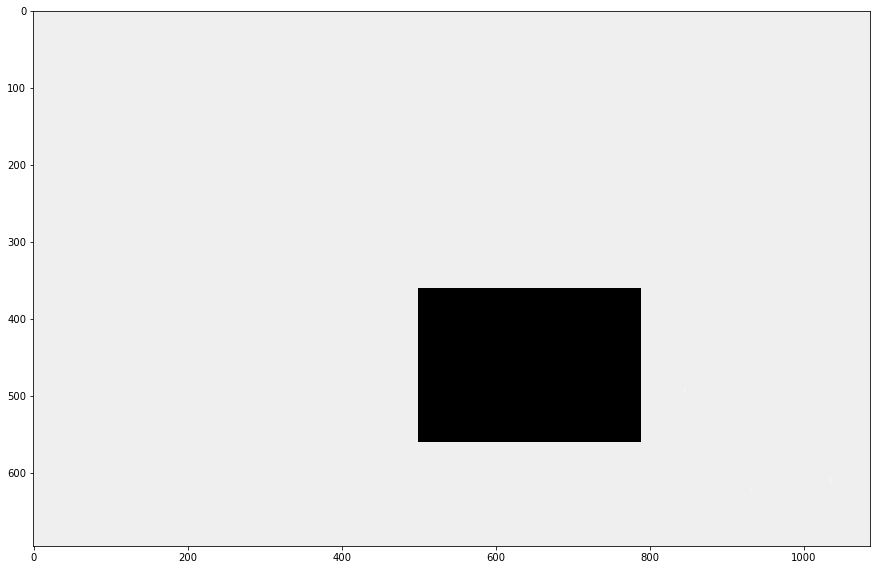

In [62]:
fig, ax = plt.subplots(figsize = (15, 10))
plt.imshow(hsi0.mean(axis=0))

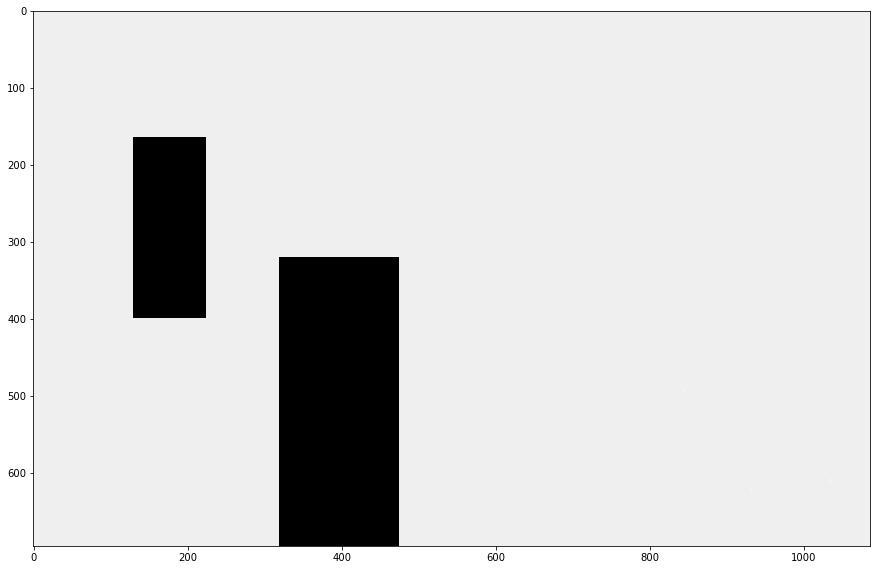

In [40]:
fig, ax = plt.subplots(figsize = (15, 10))
plt.imshow(hsi0.mean(axis=0))